# Train Custom Model Using Scikit Learn - Squat
## 1. Read in Collected Data and Process

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

In [2]:
df = pd.read_csv('squat_with_scaled_angles.csv')

In [3]:
df.head(3)

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_hip_angle,right_hip_angle,left_knee_angle,right_knee_angle,left_ankle_angle,right_ankle_angle
0,s_spine_neutral_down,0.578854,0.459936,-0.178820,0.999752,0.594528,0.448642,-0.173299,0.999830,0.594286,...,80.806623,26.355644,5.900469,43.642237,150.990237,151.839009,151.597463,149.620033,24.727200,34.591380
1,s_spine_neutral_down,0.590740,0.410155,-0.341654,0.999727,0.595270,0.397050,-0.327615,0.999847,0.594844,...,44.327974,26.873086,4.137943,48.484478,166.323610,147.648731,158.852685,146.627404,36.455001,37.264337
2,s_spine_neutral_up,0.572588,0.146920,-0.468999,0.999881,0.573966,0.125410,-0.442385,0.999909,0.573949,...,79.634025,33.591396,37.831483,21.485173,160.834280,162.095840,115.512212,136.782411,33.173339,39.736965


In [4]:
print(df['class'].unique())

['s_spine_neutral_down' 's_spine_neutral_up' 's_correct_down'
 's_correct_up' 's_feet_spread_down' 's_feet_spread_up'
 's_caved_in_knees_down' 's_caved_in_knees_up']


In [5]:
df[df['class'] == 's_correct_up']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_hip_angle,right_hip_angle,left_knee_angle,right_knee_angle,left_ankle_angle,right_ankle_angle
44,s_correct_up,0.532609,0.085706,-0.563047,0.999811,0.528613,0.068749,-0.532288,0.999753,0.528110,...,44.366343,10.829860,16.252472,28.680144,178.046098,163.428739,140.176836,137.766901,46.678850,45.077086
45,s_correct_up,0.509986,0.080937,-0.561351,0.999886,0.509227,0.065054,-0.525186,0.999847,0.509454,...,56.924309,5.591918,30.777252,27.381624,177.463074,170.191127,141.796468,141.094066,46.353155,54.505007
48,s_correct_up,0.536156,0.115871,-0.540090,0.999881,0.534467,0.097927,-0.511794,0.999856,0.534379,...,59.299757,15.405028,30.914504,27.987329,179.536938,162.433862,131.068915,134.095925,42.436687,38.713223
49,s_correct_up,0.503571,0.082825,-0.485923,0.999917,0.505458,0.067285,-0.453052,0.999893,0.506362,...,62.046061,12.610161,36.150234,22.773017,174.408689,168.863122,132.240386,128.968939,46.499370,43.435734
50,s_correct_up,0.497134,0.081578,-0.524982,0.999953,0.496747,0.065708,-0.488400,0.999938,0.497190,...,64.074852,9.894190,47.486276,23.470119,176.816952,164.953726,133.192097,142.881686,40.317367,54.471752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,s_correct_up,0.564474,0.282162,-0.762410,0.999985,0.576861,0.270818,-0.754246,0.999979,0.585696,...,32.006066,40.447500,53.887811,45.552309,164.481835,165.558079,139.548709,130.622224,58.699717,56.717444
726,s_correct_up,0.533522,0.249691,-0.741068,0.999998,0.544980,0.236946,-0.733527,0.999996,0.553173,...,28.692703,37.088561,54.604716,50.029777,179.646157,174.064734,132.423109,120.792523,63.142231,57.483173
727,s_correct_up,0.533162,0.258621,-0.578735,0.999981,0.544046,0.246213,-0.583954,0.999974,0.552371,...,36.088913,44.684369,51.811987,51.173014,175.741736,178.238531,135.443719,120.448188,62.250544,55.747445
730,s_correct_up,0.553886,0.234430,-0.784332,0.999997,0.568365,0.221136,-0.756930,0.999992,0.577073,...,6.052048,43.125127,49.050705,44.692882,179.954211,175.731964,128.955705,124.552361,57.785707,57.299206


In [6]:
X = df.drop('class', axis=1)
y = df['class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. Train Machine Learning Classification Model

In [8]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [9]:
fit_models = {}
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

In [10]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [11]:
fit_models['rc'].predict(X_test)

array(['s_caved_in_knees_up', 's_spine_neutral_down',
       's_spine_neutral_up', 's_spine_neutral_down', 's_spine_neutral_up',
       's_correct_up', 's_feet_spread_up', 's_feet_spread_down',
       's_feet_spread_down', 's_feet_spread_down',
       's_caved_in_knees_down', 's_correct_down', 's_correct_up',
       's_caved_in_knees_up', 's_correct_down', 's_feet_spread_up',
       's_feet_spread_down', 's_caved_in_knees_down',
       's_caved_in_knees_up', 's_caved_in_knees_down',
       's_caved_in_knees_down', 's_correct_up', 's_spine_neutral_down',
       's_feet_spread_up', 's_caved_in_knees_up', 's_caved_in_knees_up',
       's_feet_spread_up', 's_spine_neutral_down', 's_correct_down',
       's_spine_neutral_down', 's_caved_in_knees_down', 's_correct_up',
       's_feet_spread_up', 's_correct_down', 's_caved_in_knees_up',
       's_caved_in_knees_up', 's_correct_down', 's_caved_in_knees_up',
       's_feet_spread_up', 's_correct_up', 's_feet_spread_down',
       's_caved_in_kne

## 3.Evaluate and Serialize Model

In [12]:
from sklearn.metrics import classification_report

# 예측 결과를 저장할 딕셔너리 초기화
predictions = {}

# 각 모델에 대해 예측 수행
for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)  # 테스트 데이터에 대한 예측
    predictions[algorithm] = y_pred  # 예측 결과 저장

# 각 모델의 분류 보고서 출력
for algorithm, y_pred in predictions.items():
    print(f'--- {algorithm} 모델 분류 결과 평가 ---')
    print(classification_report(y_test, y_pred))
    print()

--- lr 모델 분류 결과 평가 ---
                       precision    recall  f1-score   support

s_caved_in_knees_down       1.00      1.00      1.00        38
  s_caved_in_knees_up       1.00      1.00      1.00        41
       s_correct_down       1.00      1.00      1.00        30
         s_correct_up       1.00      0.98      0.99        42
   s_feet_spread_down       1.00      1.00      1.00        29
     s_feet_spread_up       1.00      1.00      1.00        36
 s_spine_neutral_down       0.94      1.00      0.97        30
   s_spine_neutral_up       0.97      0.94      0.95        33

             accuracy                           0.99       279
            macro avg       0.99      0.99      0.99       279
         weighted avg       0.99      0.99      0.99       279


--- rc 모델 분류 결과 평가 ---
                       precision    recall  f1-score   support

s_caved_in_knees_down       1.00      1.00      1.00        38
  s_caved_in_knees_up       1.00      1.00      1.00        41
    

In [13]:
metrics = {
    'accuracy': {},
    'precision': {},
    'recall': {},
    'f1-score': {}
}

for algorithm, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics['accuracy'][algorithm] = accuracy
    metrics['precision'][algorithm] = precision
    metrics['recall'][algorithm] = recall
    metrics['f1-score'][algorithm] = f1

for metric, values in metrics.items():
    print(f'--- {metric} ---')
    for algorithm, score in values.items():
        print(f'{algorithm}: {score:.4f}')

--- accuracy ---
lr: 0.9892
rc: 0.9857
rf: 0.9892
gb: 0.9857
--- precision ---
lr: 0.9896
rc: 0.9859
rf: 0.9894
gb: 0.9858
--- recall ---
lr: 0.9892
rc: 0.9857
rf: 0.9892
gb: 0.9857
--- f1-score ---
lr: 0.9893
rc: 0.9857
rf: 0.9893
gb: 0.9857


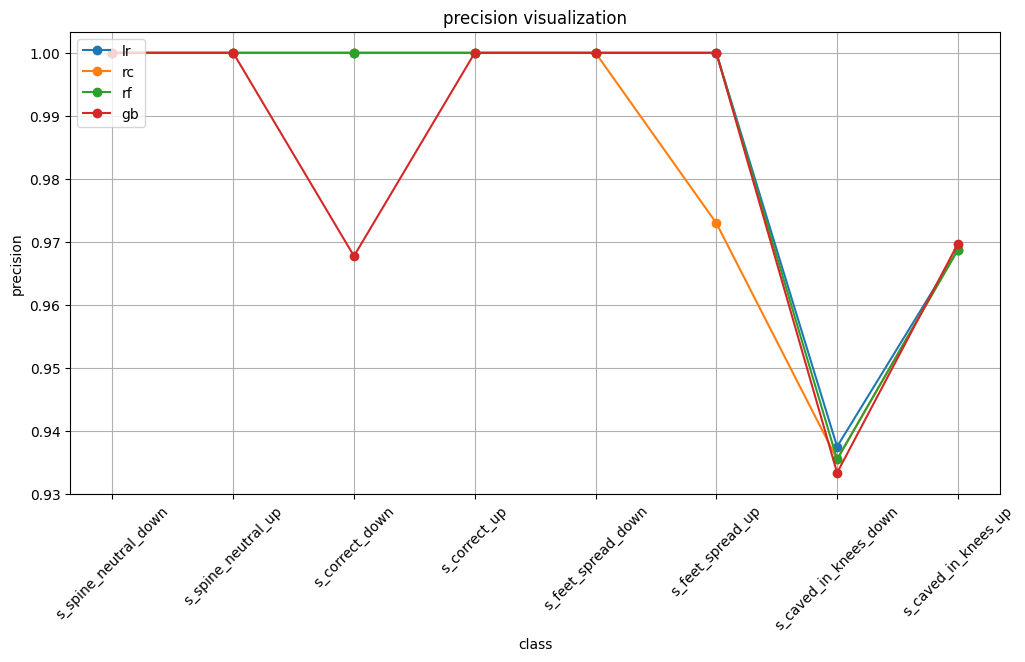

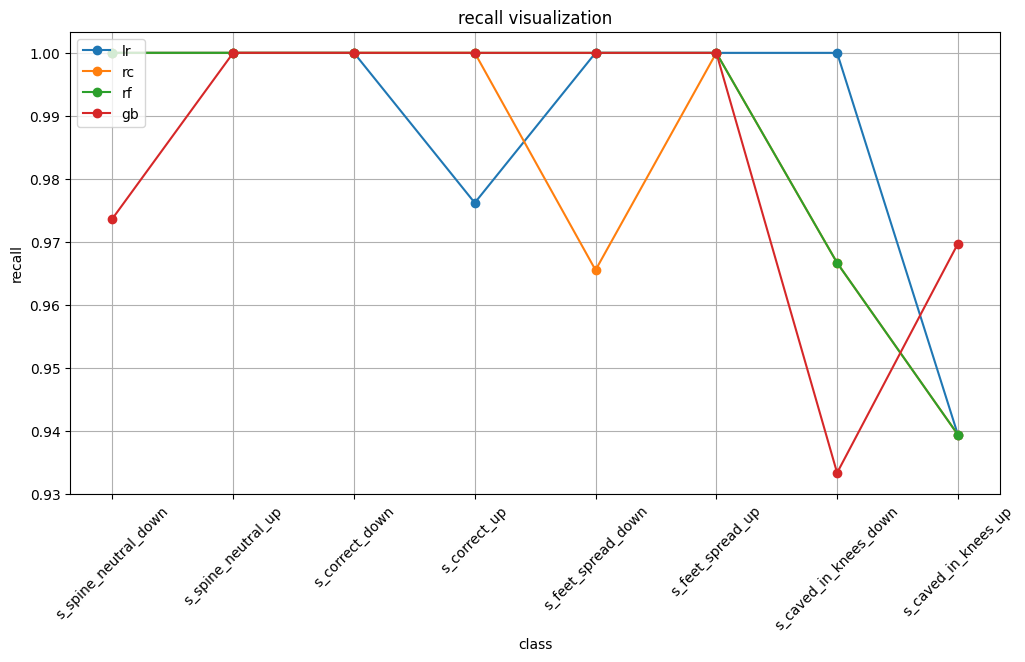

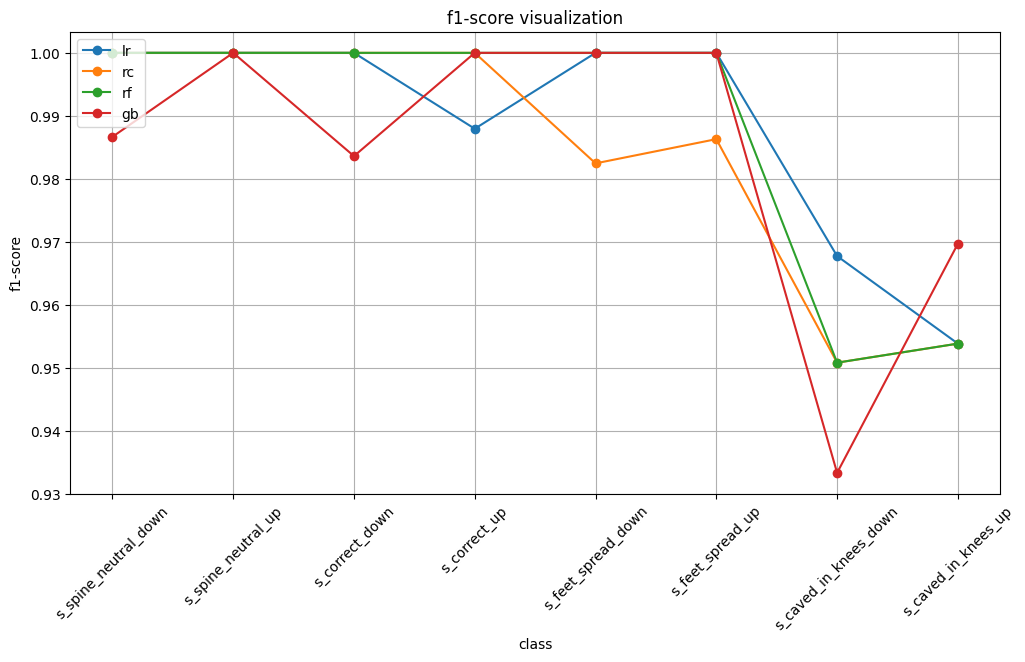

In [14]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

predictions = {}

# 각 모델에 대해 예측 수행
for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)  # 테스트 데이터에 대한 예측
    predictions[algorithm] = y_pred  # 예측 결과 저장

# 평가 지표 시각화
metrics = ['precision', 'recall', 'f1-score']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.title(f'{metric} visualization')

    for algorithm, y_pred in predictions.items():
        report = classification_report(y_test, y_pred, output_dict=True)
        metric_score = [report[label][metric] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]
        plt.plot(df['class'].unique(), metric_score, label=algorithm, marker='o', linestyle='-')

    plt.xlabel('class')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

## 4. Make Detections with Model

In [15]:
with open('squat.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)